In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import text,sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D,GlobalMaxPooling1D,MaxPooling1D
from sklearn.model_selection import train_test_split
import re    #for regex
import string
from tensorflow import keras
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TengkaiGao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [89]:
train = pd.read_csv('G:/toxic_final.csv')

In [90]:
train

,Unnamed: 0,Unnamed: 0.1,comment_text,Toxic
0,0,61,discussion requires both parties to explain th...,0
1,1,40630,avoiding edit wars acroterion i have been tr...,0
2,2,12124,omg i have never thought of it that way pure g...,0
3,3,11380,because of our recent edits to skycable the us...,0
4,4,5844,no harm done i deleted the second comment,0
...,...,...,...,...
41034,41034,43459,new mutants putlocker about to be the google ...,1
41035,41035,43460,it was better than the new mutants there were ...,1
41036,41036,43461,whenever i think that I am truly fast furious...,1
41037,41037,43462,my man was not to happy i left on this harley ...,1


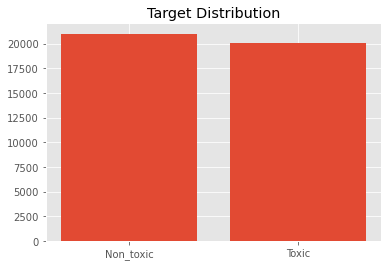

In [91]:
target_count = train.groupby('Toxic').size().reset_index(name='counts')
plt.bar(target_count.Toxic, target_count.counts)
plt.xticks([0,1], labels=["Non_toxic", "Toxic"])
plt.title("Target Distribution")
plt.show()

In [92]:
train['comment_text'] = pd.DataFrame(train["comment_text"].astype('str')) #transfomer to str 

In [166]:
x=train["comment_text"]
y=train["Toxic"]

In [167]:
#Splitting the data into train and test
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=3,shuffle=True)

In [168]:
max_feature = 3000#max feature 3000
tokenizer = tf.keras.preprocessing.text.Tokenizer(max_feature,
                                                  lower= True,
                                                  filters= '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                                                  split = " ")#tokenizer 

tokenizer.fit_on_texts(train_x)

In [169]:
sequences = tokenizer.texts_to_sequences(train_x)

In [170]:
pad_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences,
                                                             maxlen = 500)

In [171]:
test_x_tokenized=tokenizer.texts_to_sequences(test_x)
x_testing=tf.keras.preprocessing.sequence.pad_sequences(test_x_tokenized,maxlen=500)

In [172]:
pad_sequences

array([[   0,    0,    0, ...,   45,  114,   12],
       [   0,    0,    0, ...,    7,  892,  134],
       [   0,    0,    0, ...,   20,   75,  153],
       ...,
       [   0,    0,    0, ...,  420,  139,  408],
       [   0,    0,    0, ...,  596,   34, 1156],
       [   0,    0,    0, ...,  407,  497,    1]])

In [173]:
model_lstm = tf.keras.Sequential([tf.keras.layers.Embedding(max_feature,64,input_length = 500),
                                 tf.keras.layers.Dropout(0.3),
                                 tf.keras.layers.LSTM(64),
                                 tf.keras.layers.Dropout(0.3),
                                 tf.keras.layers.Dense(1, activation = "sigmoid")]
                                )

model_lstm.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_20 (Embedding)     (None, 500, 64)           192000    
_________________________________________________________________
dropout_37 (Dropout)         (None, 500, 64)           0         
_________________________________________________________________
lstm_32 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dropout_38 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 65        
Total params: 225,089
Trainable params: 225,089
Non-trainable params: 0
_________________________________________________________________


In [174]:
callback=keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0, patience=5, verbose=2, mode='auto', restore_best_weights=True)


In [151]:
model_lstm.compile(loss = "binary_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(3e-3),
                 metrics= ["accuracy"])

In [152]:
history = model_lstm.fit(
    pad_sequences,train_y,
    batch_size= 64,
    epochs= 20,
    validation_split= 0.1,
    verbose=1,callbacks=[callback]
)

Epoch 1/20
462/462 [==============================] - 18s 34ms/step - loss: 0.3208 - accuracy: 0.8647 - val_loss: 0.2251 - val_accuracy: 0.9160
Epoch 2/20
462/462 [==============================] - 15s 33ms/step - loss: 0.2285 - accuracy: 0.9079 - val_loss: 0.2390 - val_accuracy: 0.9050
Epoch 3/20
462/462 [==============================] - 15s 33ms/step - loss: 0.1986 - accuracy: 0.9202 - val_loss: 0.2195 - val_accuracy: 0.9157
Epoch 4/20
462/462 [==============================] - 15s 33ms/step - loss: 0.1752 - accuracy: 0.9277 - val_loss: 0.2158 - val_accuracy: 0.9175
Epoch 5/20
462/462 [==============================] - 15s 33ms/step - loss: 0.1680 - accuracy: 0.9333 - val_loss: 0.2365 - val_accuracy: 0.9135
Epoch 6/20
462/462 [==============================] - 15s 33ms/step - loss: 0.1499 - accuracy: 0.9410 - val_loss: 0.2440 - val_accuracy: 0.9086
Epoch 7/20
462/462 [==============================] - 15s 33ms/step - loss: 0.1734 - accuracy: 0.9319 - val_loss: 0.2685 - val_accuracy:

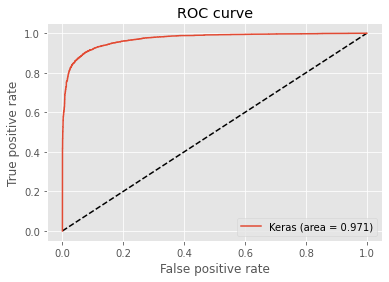

In [153]:
from sklearn.metrics import roc_curve
y_pred=model_lstm.predict(x_testing)
fpr, tpr, thresholds = roc_curve(test_y, y_pred)
from sklearn.metrics import auc
auc_keras = auc(fpr, tpr)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [154]:
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
import numpy as np
fpr, tpr, thresholds = roc_curve(test_y, y_pred)
y=tpr-fpr
idx=np.argmax(y)#Youden_index
best_threshold=thresholds[idx]
print("The best threshold is",best_threshold)
print(classification_report(test_y, y_pred >best_threshold ,digits=4))

The best threshold is 0.5476317
              precision    recall  f1-score   support

           0     0.9064    0.9259    0.9160      4154
           1     0.9223    0.9021    0.9121      4054

    accuracy                         0.9141      8208
   macro avg     0.9144    0.9140    0.9141      8208
weighted avg     0.9143    0.9141    0.9141      8208



In [155]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

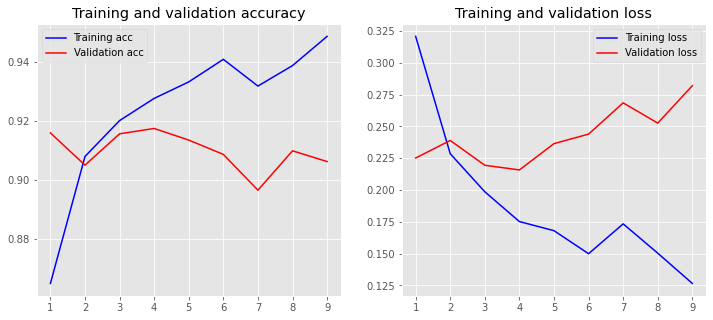

In [156]:
plot_history(history)

In [157]:
model_stack_lstm = tf.keras.Sequential([tf.keras.layers.Embedding(max_feature,64,input_length = 500),
                                tf.keras.layers.Dropout(0.3),
                                 tf.keras.layers.LSTM(64,return_sequences = True),
                                 tf.keras.layers.Dropout(0.3),
                                 tf.keras.layers.LSTM(64),
                                 tf.keras.layers.Dense(1, activation = "sigmoid")]
                                )

model_stack_lstm .summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, 500, 64)           192000    
_________________________________________________________________
dropout_34 (Dropout)         (None, 500, 64)           0         
_________________________________________________________________
lstm_28 (LSTM)               (None, 500, 64)           33024     
_________________________________________________________________
dropout_35 (Dropout)         (None, 500, 64)           0         
_________________________________________________________________
lstm_29 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 65        
Total params: 258,113
Trainable params: 258,113
Non-trainable params: 0
_______________________________________________

In [158]:
model_stack_lstm.compile(loss = "binary_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(3e-3),
                 metrics= ["accuracy"])

In [159]:
history = model_stack_lstm.fit(
    pad_sequences,train_y,
    batch_size= 64,
    epochs= 20,
    validation_split= 0.1,
    verbose=1,callbacks=[callback]
)

Epoch 1/20
462/462 [==============================] - 33s 64ms/step - loss: 0.2920 - accuracy: 0.8765 - val_loss: 0.2383 - val_accuracy: 0.9056
Epoch 2/20
462/462 [==============================] - 29s 62ms/step - loss: 0.2113 - accuracy: 0.9171 - val_loss: 0.2012 - val_accuracy: 0.9150
Epoch 3/20
462/462 [==============================] - 29s 62ms/step - loss: 0.1786 - accuracy: 0.9277 - val_loss: 0.2109 - val_accuracy: 0.9181
Epoch 4/20
462/462 [==============================] - 29s 63ms/step - loss: 0.1732 - accuracy: 0.9304 - val_loss: 0.2127 - val_accuracy: 0.9163
Epoch 5/20
462/462 [==============================] - 29s 63ms/step - loss: 0.1503 - accuracy: 0.9399 - val_loss: 0.2253 - val_accuracy: 0.9175
Epoch 6/20
462/462 [==============================] - 29s 63ms/step - loss: 0.1376 - accuracy: 0.9447 - val_loss: 0.2436 - val_accuracy: 0.9065
Epoch 7/20
462/462 [==============================] - 29s 63ms/step - loss: 0.1249 - accuracy: 0.9500 - val_loss: 0.2510 - val_accuracy:

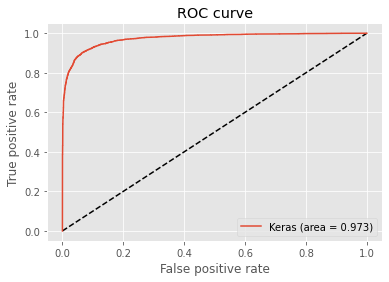

In [160]:
from sklearn.metrics import roc_curve
y_pred=model_stack_lstm.predict(x_testing)
fpr, tpr, thresholds = roc_curve(test_y, y_pred)
from sklearn.metrics import auc
auc_keras = auc(fpr, tpr)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [161]:
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
import numpy as np
fpr, tpr, thresholds = roc_curve(test_y, y_pred)
y=tpr-fpr
idx=np.argmax(y)#Youden_index
best_threshold=thresholds[idx]
print("The best threshold is",best_threshold)
print(classification_report(test_y, y_pred >best_threshold ,digits=4))

The best threshold is 0.45271495
              precision    recall  f1-score   support

           0     0.9057    0.9367    0.9209      4154
           1     0.9328    0.9001    0.9161      4054

    accuracy                         0.9186      8208
   macro avg     0.9192    0.9184    0.9185      8208
weighted avg     0.9191    0.9186    0.9186      8208



In [162]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
bi_model=Sequential()
bi_model.add(Embedding(max_feature,64,input_length = 500))
bi_model.add(Bidirectional(LSTM(64,return_sequences=True)))
bi_model.add(Dropout(0.3))
bi_model.add(Bidirectional(LSTM(64))) #lstm with 100 neurons
bi_model.add(Dense(1,activation='sigmoid'))
bi_model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(3e-3),metrics=['accuracy'])
print(bi_model.summary())

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, 500, 64)           192000    
_________________________________________________________________
bidirectional_6 (Bidirection (None, 500, 128)          66048     
_________________________________________________________________
dropout_36 (Dropout)         (None, 500, 128)          0         
_________________________________________________________________
bidirectional_7 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 129       
Total params: 356,993
Trainable params: 356,993
Non-trainable params: 0
_________________________________________________________________
None


In [163]:
history = bi_model.fit(
    pad_sequences,train_y,
    batch_size= 64,
    epochs= 20,
    validation_split= 0.1,
    verbose=1,callbacks=[callback]
)

Epoch 1/20
462/462 [==============================] - 65s 128ms/step - loss: 0.3098 - accuracy: 0.8701 - val_loss: 0.2295 - val_accuracy: 0.9099
Epoch 2/20
462/462 [==============================] - 57s 124ms/step - loss: 0.2036 - accuracy: 0.9187 - val_loss: 0.2130 - val_accuracy: 0.9126
Epoch 3/20
462/462 [==============================] - 57s 124ms/step - loss: 0.1831 - accuracy: 0.9261 - val_loss: 0.2163 - val_accuracy: 0.9141
Epoch 4/20
462/462 [==============================] - 57s 124ms/step - loss: 0.1591 - accuracy: 0.9359 - val_loss: 0.2335 - val_accuracy: 0.9150
Epoch 5/20
462/462 [==============================] - 57s 124ms/step - loss: 0.1482 - accuracy: 0.9410 - val_loss: 0.2472 - val_accuracy: 0.9083
Epoch 6/20
462/462 [==============================] - 57s 124ms/step - loss: 0.1203 - accuracy: 0.9522 - val_loss: 0.3036 - val_accuracy: 0.8977
Epoch 7/20
462/462 [==============================] - 57s 124ms/step - loss: 0.1074 - accuracy: 0.9568 - val_loss: 0.2872 - val_ac

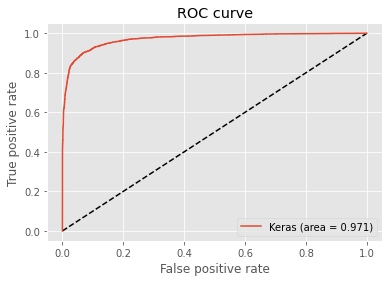

In [164]:
from sklearn.metrics import roc_curve
y_pred=bi_model.predict(x_testing)
fpr, tpr, thresholds = roc_curve(test_y, y_pred)
from sklearn.metrics import auc
auc_keras = auc(fpr, tpr)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [165]:
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
import numpy as np
fpr, tpr, thresholds = roc_curve(test_y, y_pred)
y=tpr-fpr
idx=np.argmax(y)#Youden_index
best_threshold=thresholds[idx]
print("The best threshold is",best_threshold)
print(classification_report(test_y, y_pred >best_threshold ,digits=4))

The best threshold is 0.53100085
              precision    recall  f1-score   support

           0     0.9065    0.9312    0.9187      4154
           1     0.9274    0.9016    0.9143      4054

    accuracy                         0.9165      8208
   macro avg     0.9170    0.9164    0.9165      8208
weighted avg     0.9168    0.9165    0.9165      8208

